### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
df = pd.set_option("display.max_rows",50)
df = pd.set_option("display.max_columns",50)
df = pd.read_csv("BankChurners.csv")

#### Renaming some of the columns

In [3]:
columns = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':"Naive_Bayes_Classifier_1",
          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':"Naive_Bayes_Classifier_2"}
df.rename(columns=columns,inplace=True)

#### Mapping Ordinal features to ordinal values

In [4]:
Education_Level = {"Unknown":0,'Uneducated':1,"High School":2,"College":3,"Graduate":4,"Post-Graduate":5,"Doctorate":6}
Income_Category = {"Unknown":0,'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
Card_Category = {'Blue':0,'Gold':1,'Silver':2,'Platinum':3}
df2 = df.replace({"Education_Level":Education_Level,"Income_Category":Income_Category,"Card_Category":Card_Category})

#### One Hot Encoding other categorical features


In [5]:
Endcoded_columns = pd.get_dummies(df2[["Attrition_Flag","Gender","Marital_Status"]],drop_first='True')

##### Joining all columns together and deleting the unwanted columns

In [6]:
df3 = pd.concat([Endcoded_columns,df2],axis=1).drop(columns=["CLIENTNUM","Attrition_Flag","Gender","Marital_Status"])

<AxesSubplot:>

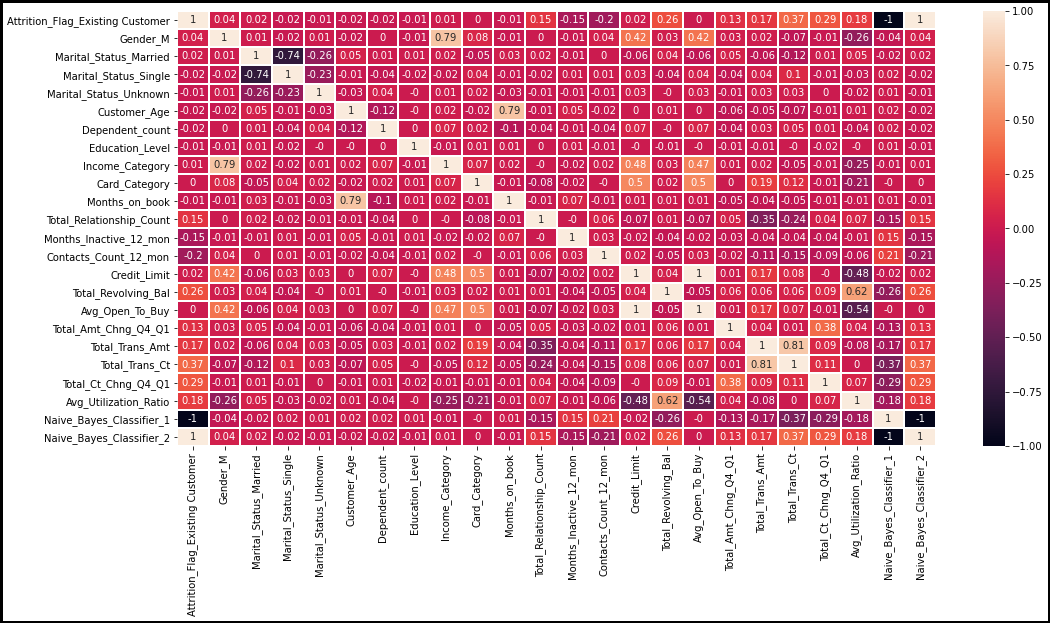

In [7]:
plt.figure(figsize=[17,8],edgecolor="black",linewidth=5.0)
sns.heatmap(df3.corr().round(decimals=2),annot=True,linewidths=1.0)

In [8]:
df3

,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1,Naive_Bayes_Classifier_2
0,1,1,1,0,0,45,3,2,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,1,0,0,1,0,49,5,4,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,1,1,1,0,0,51,3,4,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,1,0,0,0,1,40,4,2,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,1,1,1,0,0,40,3,1,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,1,0,1,0,50,2,4,2,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,0,1,0,0,0,41,2,0,2,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,0,0,1,0,0,44,1,2,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,0,1,0,0,1,30,2,4,2,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [9]:
pd.crosstab(df.Education_Level,df.Attrition_Flag)

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,154,859
Doctorate,95,356
Graduate,487,2641
High School,306,1707
Post-Graduate,92,424
Uneducated,237,1250
Unknown,256,1263


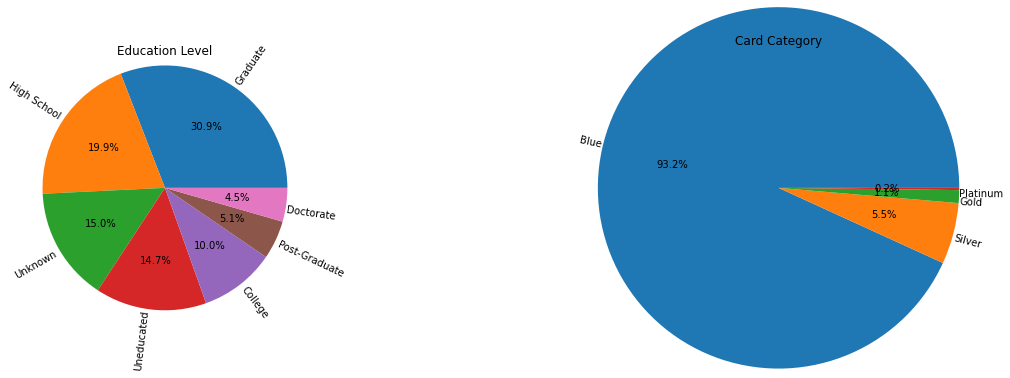

<Figure size 432x288 with 0 Axes>

In [24]:
plt.subplot(121,)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
df.Education_Level.value_counts().plot(kind="pie",rotatelabels = 270,labeldistance=1,radius=2.1,subplots='True',autopct='%1.1f%%')
plt.title("Education Level", loc='center',pad=60.0)
plt.ylabel(" ")
plt.tight_layout()

plt.subplot(122)
plt.subplots_adjust(left=None, bottom=None, right=2.0, top=None, wspace=3.0, hspace=None)
df.Card_Category.value_counts().plot(kind="pie",rotatelabels = 270,labeldistance=1.0,radius=3.1,autopct='%1.1f%%')
plt.title("Card Category",pad=70.0)
plt.ylabel(" ")
plt.show()
plt.tight_layout()


In [13]:
for x in df.columns:
    print(x,":",df[x].unique())

CLIENTNUM : [768805383 818770008 713982108 ... 716506083 717406983 714337233]
Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Customer_Age : [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Gender : ['M' 'F']
Dependent_count : [3 5 4 2 0 1]
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']
Months_on_book : [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Total_Relationship_Count : [5 6 4 3 2 1]
Months_Inactive_12_mon : [1 4 2 3 6 0 5]
Contacts_Count_12_mon : [3 2 0 1 4 5 6]
Credit_Limit : [12691.  8256.  3418. ...  5409.  5281. 10388.]
Tot

## Importing the Differential Privacy Library

In [17]:
from diffprivlib.models import GaussianNB
from sklearn.model_selection import train_test_split

In [18]:
X = df3.drop(columns=["Attrition_Flag_Existing Customer"])
y= df3["Attrition_Flag_Existing Customer"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#### Imbalanced Dataset
The percentages of the target values are very imbalanced making the dataset very imbalanced i.e. Existing Customer = 83% and Attrited Customer = 16%

In [19]:
df3["Attrition_Flag_Existing Customer"].value_counts(normalize=True)*100

1    83.934038
0    16.065962
Name: Attrition_Flag_Existing Customer, dtype: float64

In [20]:
clf = GaussianNB()
clf.fit(X_train,y_train)

C:\Users\JK\anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:100: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0)]),
           bounds=(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3000e+01,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.4383e+03, 0.0000e+00,
       3.0000e+00, 0.0000e+00, 5.1000e+02, 1.0000e+01, 0.0000e+00,
       0.0000e+00, 7.6642e-06, 4.1998e-04]),
                   array([1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 7.3000e+01,
       5.0000e+00, 6.0000e+00, 5.0000e+00, 3.0000e+00, 5.6000e+01,
       6.0000e+00, 6.0000e+00, 6.0000e+00, 3.4516e+04, 2.5170e+03,
       3.4516e+04, 3.3970e+00, 1.7744e+04, 1.3900e+02, 3.7140e+00,
       9.9900e-01, 9.9958e-01, 9.9999e-01])))

Solving environment: ...working... done

# All requested packages already installed.



In [21]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)